In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
business = pd.read_csv('/content/restaurant.csv', engine='python')
business.head()

,business_id,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,categories,city,is_open,latitude,longitude,na_counts,postal_code,review_count,stars,state,totalhours.Friday,totalhours.Monday,totalhours.Saturday,totalhours.Sunday,totalhours.Thursday,totalhours.Tuesday,totalhours.Wednesday,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,garage parking,street parking,validated parking,parking lot,valet parking,dessert,latenight_food,lunch,dinner,brunch,breakfast
0,--164t1nclzzmca7eDiJMw,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,False,NaN,u'average',NaN,True,u'casual',NaN,True,True,1,False,NaN,True,NaN,NaN,u'free',"Food, Ethnic Food, Nightlife, Restaurants, Div...",Austin,0,30.264896,-97.731028,21,78702,137,4.0,TX,14.5,6.0,7.0,6.0,14.5,12.5,12.5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,--6COJIAjkQwSUZci_4PJQ,NaN,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,False,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,False,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,False,NaN,u'quiet',NaN,False,u'casual',NaN,False,True,2,True,True,True,NaN,True,u'free',"Breakfast & Brunch, Bakeries, Tea Rooms, Coffe...",Portland,0,45.467868,-122.714524,15,97219,99,4.0,OR,7.0,24.0,7.0,7.0,7.0,7.0,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1
2,--Q3mAcX9t63f7Xcbn7LVA,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,"American (Traditional), Restaurants, Gastropubs",Columbus,1,40.145557,-82.977284,39,43240,107,4.5,OH,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,--UNNdnHRhsyFUbDgumdtQ,NaN,'beer_and_wine',"{'touristy': False, 'hipster': False, 'romanti...",NaN,'yes_corkage',NaN,True,False,True,"{'garage': False, 'street': True, 'validated':...",NaN,False,NaN,True,NaN,False,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",False,False,NaN,u'average',NaN,None,'casual',NaN,None,False,3,True,True,True,NaN,True,u'free',"French, Restaurants, American (New)",Portland,1,45.522796,-122.657872,13,97214,1236,4.5,OR,5.0,24.0,5.0,-1.0,5.0,5.0,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,--_nBudPOb1lNRgKfjLtrw,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,NaN,'average',NaN,False,u'casual',NaN,False,True,2,False,True,True,NaN,NaN,'no',"Mexican, Gastropubs, Restaurants",Columbus,0,40.117275,-83.068481,19,43235,8,4.0,OH,6.0,-1.0,6.0,5.0,6.0,6.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
business= business.replace(['True', 'False'], [1, 0])
business= business.replace(['None', "'none'", "u'none'", "'no'", "u'no'"],  0)
business= business.replace(["'beer_and_wine'", "u'beer_and_wine'", "'full_bar'", "u'full_bar'", "'free'", "u'free'",
                                        "'yes_corkage'", "'yes_free'", "u'yes_free'", "u'yes_corkage'",
                                        "u'paid'", "'paid'"], 1)

In [ ]:
#These are the ones that have continuous values and that have nan values
business = business.drop(['business_id','attributes.AgesAllowed','attributes.ByAppointmentOnly','attributes.RestaurantsCounterService', 'attributes.Open24Hours', 'attributes.DietaryRestrictions','attributes.RestaurantsAttire', 'attributes.BusinessAcceptsBitcoin','postal_code','city','attributes.NoiseLevel', 'attributes.Music', 'attributes.BestNights','attributes.Ambience', 'attributes.BusinessParking', 'attributes.GoodForMeal', 'categories'], axis=1)

In [ ]:
business

,attributes.Alcohol,attributes.BYOB,attributes.BYOBCorkage,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.HappyHour,attributes.HasTV,attributes.OutdoorSeating,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,is_open,latitude,longitude,na_counts,review_count,stars,state,totalhours.Friday,totalhours.Monday,totalhours.Saturday,totalhours.Sunday,totalhours.Thursday,totalhours.Tuesday,totalhours.Wednesday,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,garage parking,street parking,validated parking,parking lot,valet parking,dessert,latenight_food,lunch,dinner,brunch,breakfast
0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,1.0,1.0,1,0.0,NaN,1.0,NaN,NaN,1.0,0,30.264896,-97.731028,21,137,4.0,TX,14.5,6.0,7.0,6.0,14.5,12.5,12.5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,2,1.0,1.0,1.0,NaN,1.0,1.0,0,45.467868,-122.714524,15,99,4.0,OR,7.0,24.0,7.0,7.0,7.0,7.0,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,40.145557,-82.977284,39,107,4.5,OH,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,NaN,1.0,1.0,1.0,0.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,1.0,1.0,NaN,1.0,1.0,1,45.522796,-122.657872,13,1236,4.5,OR,5.0,24.0,5.0,-1.0,5.0,5.0,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,1.0,2,0.0,1.0,1.0,NaN,NaN,0.0,0,40.117275,-83.068481,19,8,4.0,OH,6.0,-1.0,6.0,5.0,6.0,6.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,0.0,NaN,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,1.0,1,0.0,NaN,1.0,NaN,NaN,NaN,0,42.423278,-71.063220,23,11,3.0,MA,11.0,11.0,11.0,-1.0,11.0,11.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36336,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1,0.0,NaN,1.0,NaN,NaN,NaN,1,42.395586,-71.040259,25,15,2.0,MA,17.0,17.0,17.0,17.0,17.0,17.0,17.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36337,1.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,2,1.0,1.0,0.0,NaN,NaN,0.0,1,33.756987,-84.392982,20,118,3.5,GA,5.0,-1.0,5.0,-1.0,5.0,5.0,5.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
36338,0.0,0.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,0.0,1.0,1,45.558409,-122.865780,20,31,4.0,OR,11.0,24.0,11.0,11.0,10.5,10.5,10.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


attributes.Alcohol float64
attributes.BYOB float64
attributes.BYOBCorkage float64
attributes.BikeParking float64
attributes.BusinessAcceptsCreditCards float64
attributes.Caters float64
attributes.CoatCheck float64
attributes.Corkage float64
attributes.DogsAllowed float64
attributes.DriveThru float64
attributes.GoodForDancing float64
attributes.GoodForKids float64
attributes.HappyHour float64
attributes.HasTV float64
attributes.OutdoorSeating float64
attributes.RestaurantsDelivery float64
attributes.RestaurantsGoodForGroups float64
attributes.RestaurantsPriceRange2 object
attributes.RestaurantsReservations float64
attributes.RestaurantsTableService float64
attributes.RestaurantsTakeOut float64
attributes.Smoking object
attributes.WheelchairAccessible float64
attributes.WiFi float64
is_open int64
latitude float64
longitude float64
na_counts int64
review_count int64
stars float64
state object
totalhours.Friday float64
totalhours.Monday float64
totalhours.Saturday float64
totalhours.Sunday

In [ ]:
business = business.drop(['state', 'attributes.Smoking'], axis=1)

In [ ]:
for i in business.columns[business.isna().any()].tolist():
  print(i, len(pd.unique(business[i])))

attributes.Alcohol 3
attributes.BYOB 3
attributes.BYOBCorkage 3
attributes.BikeParking 3
attributes.BusinessAcceptsCreditCards 3
attributes.Caters 3
attributes.CoatCheck 3
attributes.Corkage 3
attributes.DogsAllowed 3
attributes.DriveThru 3
attributes.GoodForDancing 3
attributes.GoodForKids 3
attributes.HappyHour 3
attributes.HasTV 3
attributes.OutdoorSeating 3
attributes.RestaurantsDelivery 3
attributes.RestaurantsGoodForGroups 3
attributes.RestaurantsPriceRange2 6
attributes.RestaurantsReservations 3
attributes.RestaurantsTableService 3
attributes.RestaurantsTakeOut 3
attributes.WheelchairAccessible 3
attributes.WiFi 3


In [ ]:
a= business.columns[business.isna().any()].tolist()

In [ ]:
#X = pd.get_dummies(business.drop(columns='is_open'))
X= pd.get_dummies(business.drop(columns='is_open'), columns=a)
#X = business.drop(columns='is_open').astype('category')
y = business['is_open']

In [ ]:
X

,latitude,longitude,na_counts,review_count,stars,totalhours.Friday,totalhours.Monday,totalhours.Saturday,totalhours.Sunday,totalhours.Thursday,totalhours.Tuesday,totalhours.Wednesday,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,garage parking,street parking,validated parking,parking lot,valet parking,dessert,latenight_food,lunch,dinner,brunch,breakfast,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.BYOBCorkage_0.0,attributes.BYOBCorkage_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,...,attributes.BusinessAcceptsCreditCards_1.0,attributes.Caters_0.0,attributes.Caters_1.0,attributes.CoatCheck_0.0,attributes.CoatCheck_1.0,attributes.Corkage_0.0,attributes.Corkage_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.GoodForDancing_0.0,attributes.GoodForDancing_1.0,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.RestaurantsPriceRange2_0,attributes.RestaurantsPriceRange2_1,attributes.RestaurantsPriceRange2_2,attributes.RestaurantsPriceRange2_3,attributes.RestaurantsPriceRange2_4,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.RestaurantsTableService_0.0,attributes.RestaurantsTableService_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.WheelchairAccessible_0.0,attributes.WheelchairAccessible_1.0,attributes.WiFi_0.0,attributes.WiFi_1.0
0,30.264896,-97.731028,21,137,4.0,14.5,6.0,7.0,6.0,14.5,12.5,12.5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
1,45.467868,-122.714524,15,99,4.0,7.0,24.0,7.0,7.0,7.0,7.0,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1
2,40.145557,-82.977284,39,107,4.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45.522796,-122.657872,13,1236,4.5,5.0,24.0,5.0,-1.0,5.0,5.0,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1
4,40.117275,-83.068481,19,8,4.0,6.0,-1.0,6.0,5.0,6.0,6.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,42.423278,-71.063220,23,11,3.0,11.0,11.0,11.0,-1.0,11.0,11.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
36336,42.395586,-71.040259,25,15,2.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
36337,33.756987,-84.392982,20,118,3.5,5.0,-1.0,5.0,-1.0,5.0,5.0,5.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
36338,45.558409,-122.865780,20,31,4.0,11.0,24.0,11.0,11.0,10.5,10.5,10.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24347, 81) (11993, 81) (24347,) (11993,)


In [ ]:
alphas = np.logspace(-5, 1 , num=10, base=10)
coefs = []

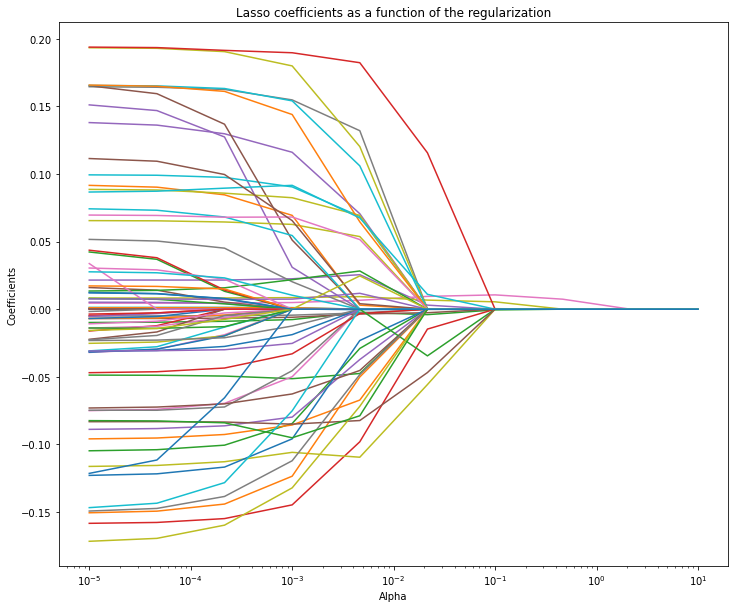

In [ ]:
#cross validating the value of alpha so we get a good amount of features that have coefficient of 0
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

for a in alphas:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=10.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=88,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08,...
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

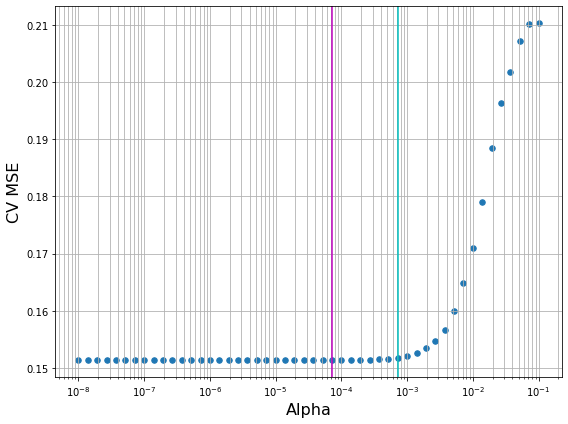

In [ ]:
#even tightening that range (cross validation) based on the mean error
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [ ]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0007196856730011514


In [ ]:
lasso_cv = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=10.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=88,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0007196856730011514]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#This is the top 28 features in order
cols = X_train.columns
coefs = lasso_cv.best_estimator_.coef_
sorted(zip(abs(coefs), cols))[-28:]

[(0.06333836244956069, 'lunch'),
 (0.06443669581241242, 'attributes.GoodForKids_1.0'),
 (0.06571920542793534, 'touristy'),
 (0.06737080824115826, 'attributes.HappyHour_0.0'),
 (0.0701748581113101, 'attributes.RestaurantsTakeOut_0.0'),
 (0.07479802152766923, 'breakfast'),
 (0.08077159381884225, 'attributes.BYOB_1.0'),
 (0.08197839770584983, 'attributes.GoodForKids_0.0'),
 (0.08300259945388226, 'attributes.DogsAllowed_0.0'),
 (0.08542532448064322, 'attributes.RestaurantsGoodForGroups_1.0'),
 (0.08684640952611326, 'attributes.BusinessAcceptsCreditCards_1.0'),
 (0.09014094632649616, 'attributes.RestaurantsReservations_1.0'),
 (0.09024700183410568, 'attributes.Alcohol_0.0'),
 (0.09167241976007519, 'attributes.HasTV_1.0'),
 (0.0919458824807577, 'attributes.RestaurantsPriceRange2_3'),
 (0.09257734019582602, 'dinner'),
 (0.10226431344935843, 'attributes.OutdoorSeating_0.0'),
 (0.1076615561773266, 'attributes.HasTV_0.0'),
 (0.11998355672865657, 'attributes.BYOB_0.0'),
 (0.1199881551736008, 'att